In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Attributes
# People
# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level
# Marital_Status: Customer's marital status
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if customer complained in the last 2 years, 0 otherwise
# 
# Products
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 year
#
#  Promotion
# NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
# 
# Place
# NumWebPurchases: Number of purchases made through the company’s web site
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to company’s web site in the last month

#Questions
#what age range is most likely to purchase a deal with a discount
#what age range purchases the most wine? fish? meat?
#how does income affect purchasing decisions? are they more likely to buy discounted items?

#Sources
#https://www.kaggle.com/code/aradhanapratap/consumer-buying-behavior-analysis/input

In [91]:
df = pd.read_csv('marketing_campaign.csv', sep= '\t')
df.isna().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [92]:
#need to find average income
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [93]:
#Replace NA income with income average
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [94]:
# combining general columns to reduce number of dimensions
df['Age'] = 2015 - df['Year_Birth']
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# deleting unused columns to clean up df
col_del = ['Z_CostContact', 'Z_Revenue', 'Year_Birth', "AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,Graduation,Single,58138.0,04-09-2012,58,0,58,0,1617,1,25
1,2174,Graduation,Single,46344.0,08-03-2014,38,0,61,2,27,0,6
2,4141,Graduation,Together,71613.0,21-08-2013,26,0,50,0,776,0,21
3,6182,Graduation,Together,26646.0,10-02-2014,26,0,31,1,53,0,8
4,5324,PhD,Married,58293.0,19-01-2014,94,0,34,1,422,0,19


In [95]:
#changing education strings to american equivilant
df['Education'] = df['Education'].replace(['Graduation', 'Basic', '2n Cycle'],['BA', 'HS', 'Assoc'])

In [96]:
df.value_counts(df['Education'])

Education
BA        1127
PhD        486
Master     370
Assoc      203
HS          54
Name: count, dtype: int64

In [100]:
#plotting income average vs education 
#need to find the average salary for each education level
 
df.groupby('Education')['Income'].mean()


Education
Assoc     47701.378099
BA        52715.755781
HS        20306.259259
Master    52908.476370
PhD       56105.210405
Name: Income, dtype: float64

In [140]:
#remove outlier/row with an income of 666666.0
df = df.drop(2233)

In [141]:
data = pd.DataFrame(df.groupby('Education')['Income'].describe())
data

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Assoc,203.0,47701.378099,21961.310186,7500.0,28095.00,46891.000000,65100.5,96547.0
BA,1126.0,52170.506896,21249.662985,1730.0,34920.75,52247.251354,69696.0,157146.0
HS,54.0,20306.259259,6235.066773,7500.0,15405.25,20744.000000,24882.0,34445.0
Master,370.0,52908.476370,20020.901834,6560.0,37853.75,51044.500000,66596.0,157733.0
PhD,486.0,56105.210405,20510.232102,4023.0,40654.25,55005.000000,69084.0,162397.0


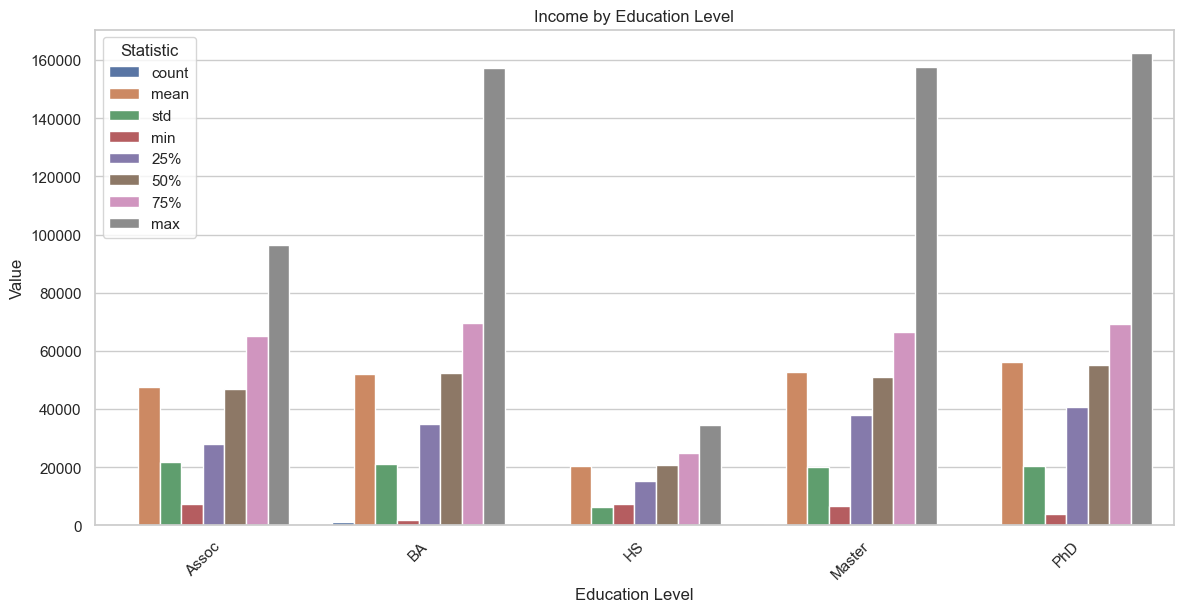

In [145]:
#plotting the income statistics of each education level

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Reshape the data for the grouped bar plot
fdata_long = data.reset_index().melt(id_vars='Education', var_name='Statistic', value_name='Value')

# Create the grouped bar plot
sns.barplot(x='Education', y='Value', hue='Statistic', data=fdata_long)
plt.xlabel('Education Level')
plt.ylabel('Value')
plt.title('Income by Education Level')
plt.legend(title='Statistic')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

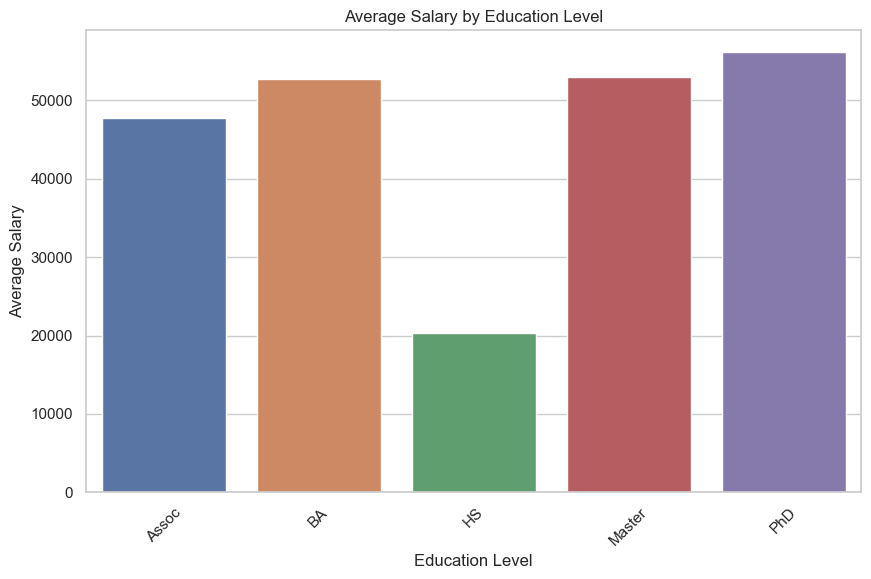

In [104]:
#This graph is plotted with the 24 NA values replaced with the average income 
#for all education levels 

average_salary_by_education = df.groupby('Education')['Income'].mean()

# Convert the groupby result into a DataFrame
average_salary_df = average_salary_by_education.reset_index()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=average_salary_df)
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level')
plt.xticks(rotation=45)
plt.show()

In [165]:
#comparing expenses to the amount of kids someone has

info = pd.DataFrame(df.groupby('Kids')['Expenses'].describe()).rename(columns={'count':'Expenses'})
info

,Expenses,mean,std,min,25%,50%,75%,max
Kids,,,,,,,,
0,638.0,1106.029781,645.001438,6.0,634.5,1189.5,1594.75,2525.0
1,1127.0,473.097604,478.056004,5.0,63.5,306.0,805.00,2194.0
2,421.0,245.947743,311.328287,9.0,45.0,93.0,316.00,1750.0
3,53.0,274.603774,414.277051,8.0,35.0,88.0,348.00,1616.0


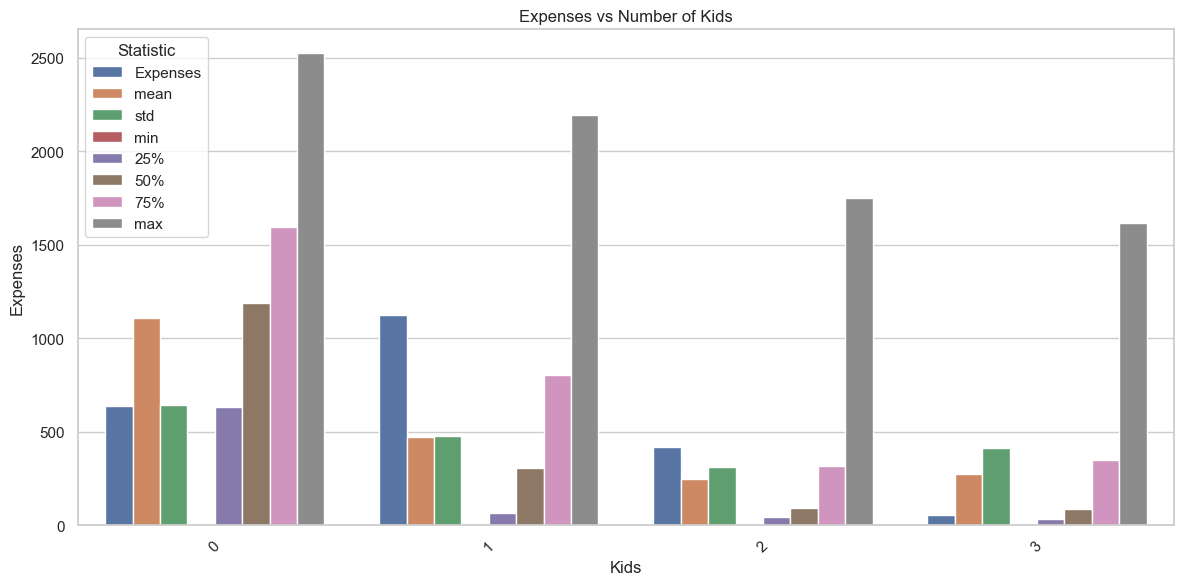

In [164]:
#Plotting expenses vs amount of kids 
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Reshape the data for the grouped bar plot
fdata_long = info.reset_index().melt(id_vars='Kids', var_name='Statistic', value_name='Value')

# Create the grouped bar plot
sns.barplot(x='Kids', y='Value', hue='Statistic', data=fdata_long)
plt.xlabel('Kids')
plt.ylabel('Expenses')
plt.title('Expenses vs Number of Kids')
plt.legend(title='Statistic')

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()